In [198]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [251]:
delay_df = pd.read_csv('Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')
code_df = pd.read_csv('Toronto-Subway-Delay-Codes.csv')

In [201]:
neighbourhoods = gpd.read_file('Neighbourhoods.shp')
#neighbourhoods.head(5)

In [202]:
weather_data_2019 = pd.concat([pd.read_csv('Weather_Data/2019/'+filen) for filen in os.listdir('Weather_Data/2019')])
weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 00:00,2019,1,1,00:00,4.3,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 01:00,2019,1,1,01:00,5.1,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 02:00,2019,1,1,02:00,5.9,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 03:00,2019,1,1,03:00,3.3,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019-01-01 04:00,2019,1,1,04:00,2.8,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
weather_data_2019.index = pd.DatetimeIndex(weather_data_2019['Date/Time'])
weather_data_2019 = weather_data_2019.drop(['Date/Time'], axis=1)
weather_data_2019.index = weather_data_2019.index.tz_localize(tz='EST')

weather_data_2019.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,00:00,4.3,NaN,...,NaN,4.8,NaN,98.49,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,01:00,5.1,NaN,...,NaN,16.1,NaN,98.47,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,02:00,5.9,NaN,...,NaN,4.0,NaN,98.57,NaN,NaN,NaN,NaN,NaN,"Rain,Fog"
2019-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,03:00,3.3,NaN,...,NaN,16.1,NaN,98.98,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2019,1,1,04:00,2.8,NaN,...,NaN,16.1,NaN,99.29,NaN,NaN,NaN,NaN,NaN,NaN


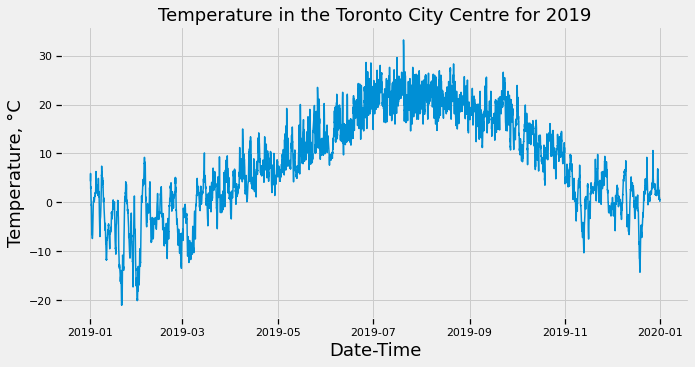

In [204]:
# Write your code here.
plt.figure(figsize=(10, 5))
plt.title('Temperature in the Toronto City Centre for 2019', fontsize=18)
ax = sns.lineplot(data=weather_data_2019, x=weather_data_2019.index, y='Temp (°C)')
ax.set_xlabel('Date-Time', fontsize=18)
ax.set_ylabel('Temperature, °C', fontsize=18)
plt.show()

In [205]:
delay_df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386


In [206]:
delay_df.dtypes

Date         object
Time         object
Day          object
Station      object
Code         object
Min Delay     int64
Min Gap       int64
Bound        object
Line         object
Vehicle       int64
dtype: object

In [207]:
#delay_df['dtime'] = pd.to_datetime(delay_df['Date'] + ' ' + delay_df['Time'])

In [208]:
missing_df = delay_df.isnull().sum().to_frame('count')
missing_df

,count
Date,0
Time,0
Day,0
Station,0
Code,1
Min Delay,0
Min Gap,0
Bound,32214
Line,544
Vehicle,0


In [209]:
line = delay_df['Line'].value_counts(normalize=True)
line

YU                        0.463741
BD                        0.451501
SRT                       0.037022
SHP                       0.034114
YU/BD                     0.011920
                            ...   
341 KEELE                 0.000007
63 OSSINGTON              0.000007
129 MCCOWAN NORTH         0.000007
YU BD                     0.000007
YONGE/UNIVERSITY/BLOOR    0.000007
Name: Line, Length: 71, dtype: float64

In [210]:
print("Percentage of Accurate Data:\n" ,line.iloc[0:4].sum()*100)

Percentage of Accurate Data:
 98.63781883618253


In [211]:
line.index[0:4].values.tolist()

['YU', 'BD', 'SRT', 'SHP']

In [212]:
bound = delay_df['Bound'].value_counts()
bound

S    30518
W    28736
E    26793
N    25561
B       90
Y        2
R        1
5        1
0        1
Name: Bound, dtype: int64

In [213]:
bound.index[0:4].values.tolist()

['S', 'W', 'E', 'N']

In [214]:
newdf = delay_df.loc[delay_df['Line'].isin(line.index[0:4].values.tolist()) & delay_df['Bound'].isin(bound.index[0:4].values.tolist())]
newdf

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
5,2014/01/01,03:29,Wednesday,DUFFERIN STATION,MUPAA,0,0,E,BD,5174
...,...,...,...,...,...,...,...,...,...,...
143908,2021/06/30,00:11,Wednesday,BAY STATION,PUTDN,0,0,W,BD,5112
143909,2021/06/30,00:42,Wednesday,VAUGHAN MC STATION,MUPAA,0,0,S,YU,5511
143910,2021/06/30,00:45,Wednesday,OSSINGTON STATION,MUIRS,0,0,E,BD,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [215]:
newdf['Bound'].value_counts()

S    30492
W    28684
E    26746
N    25542
Name: Bound, dtype: int64

In [216]:
newdf.isnull().sum()

Date         0
Time         0
Day          0
Station      0
Code         1
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64

In [217]:
newdf.shape

(111464, 10)

In [218]:
delay_df.shape

(143917, 10)

In [219]:
newdf.dropna(how='any',inplace=True)

In [220]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111463 entries, 0 to 143916
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       111463 non-null  object
 1   Time       111463 non-null  object
 2   Day        111463 non-null  object
 3   Station    111463 non-null  object
 4   Code       111463 non-null  object
 5   Min Delay  111463 non-null  int64 
 6   Min Gap    111463 non-null  int64 
 7   Bound      111463 non-null  object
 8   Line       111463 non-null  object
 9   Vehicle    111463 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.4+ MB


In [221]:
newdf['Min Delay']

0         55
1          3
3          3
4          5
5          0
          ..
143908     0
143909     0
143910     0
143915     9
143916     5
Name: Min Delay, Length: 111463, dtype: int64

In [224]:
df_100delay=newdf.sort_values('Min Delay', ascending=False).head(100)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


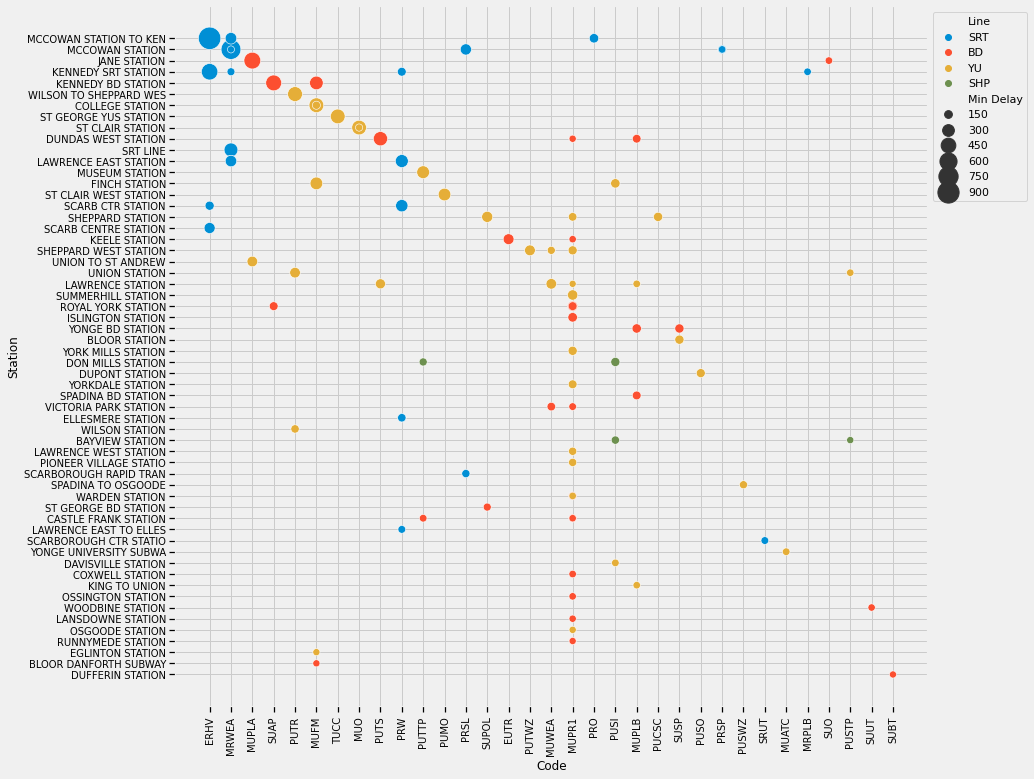

In [226]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_100delay['Code'],y=df_100delay['Station'],hue=df_100delay['Line'],size=df_100delay['Min Delay'],data=df_100delay,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

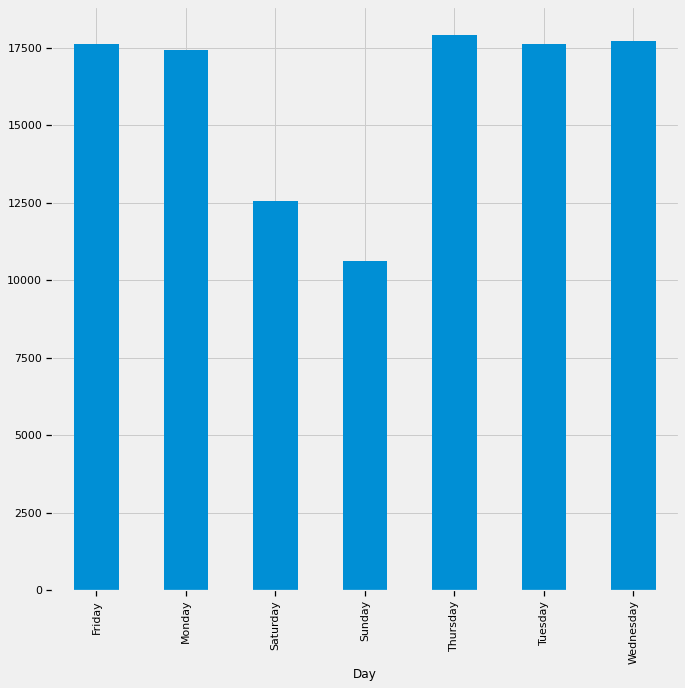

In [229]:
newdf.groupby('Day')['Code'].count().plot.bar(figsize=(10,10))
plt.show()

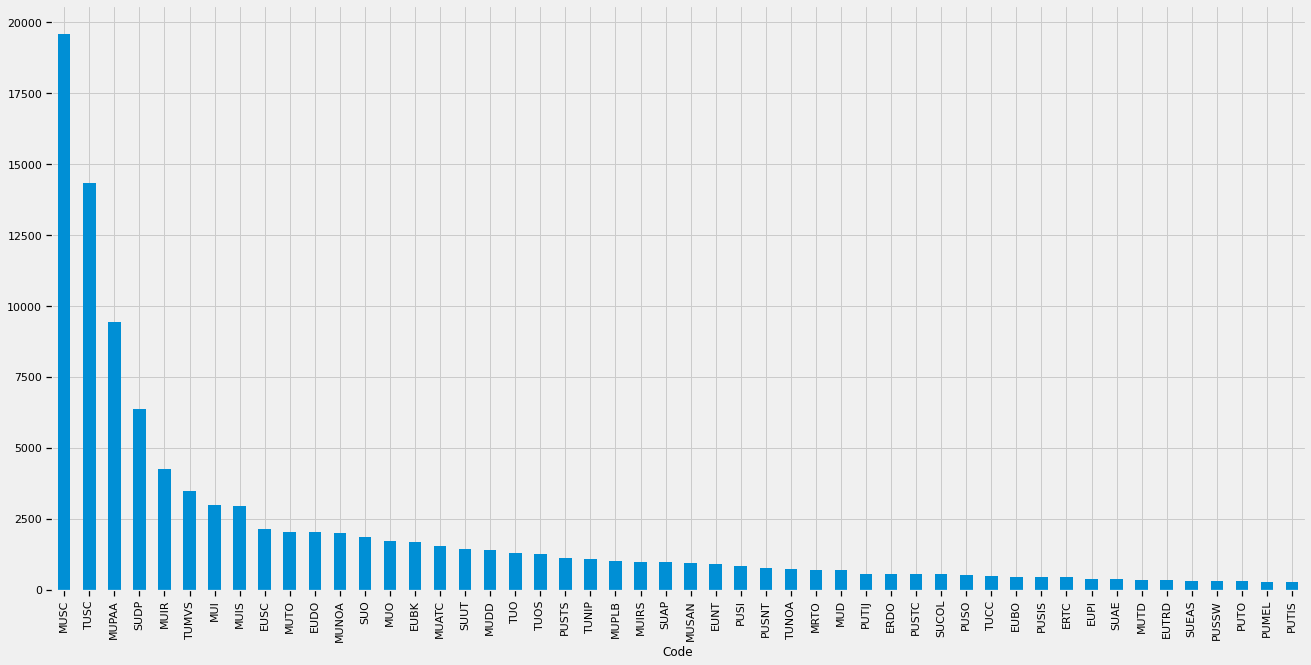

In [232]:
newdf.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

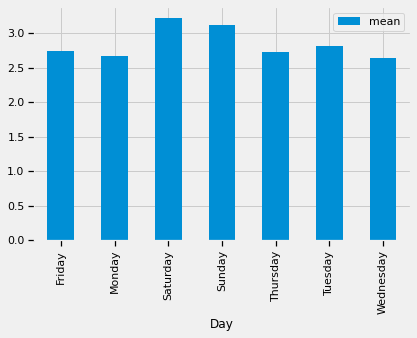

In [241]:
#plt.figure(figsize=(20, 6))
newdf.groupby(newdf['Day'])['Min Delay'].agg(['mean']).plot.bar()
plt.show()

In [255]:
code_df.loc[code_df['RMENU CODE'] == 'MUSC']['CODE DESCRIPTION']

53    Miscellaneous Speed Control
Name: CODE DESCRIPTION, dtype: object

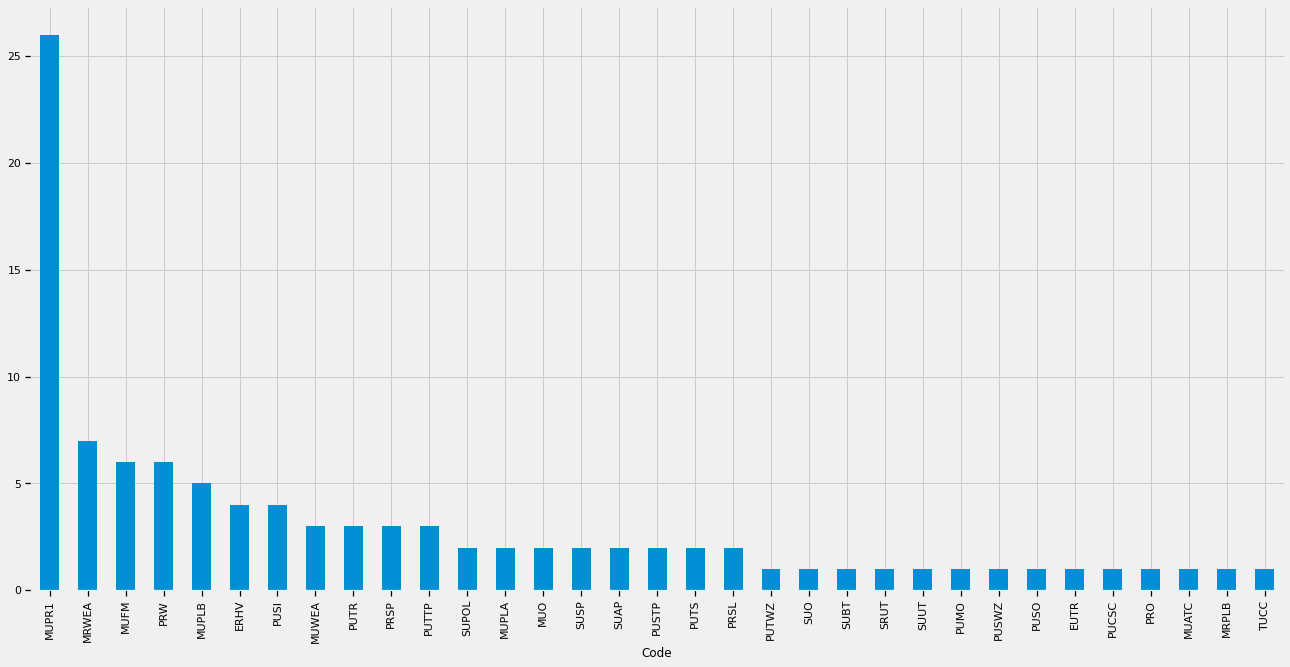

In [256]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))
plt.show()

In [261]:
df_100delay.groupby('Code')['Code'].count().sort_values(ascending=False).index[0]

'MUPR1'

In [263]:
code_df.loc[code_df['RMENU CODE'] == 'MUPR1']['CODE DESCRIPTION']

51    Priority One - Train in Contact With Person
Name: CODE DESCRIPTION, dtype: object